<h1><center><font color="blue">Preprocessing using counting technique </center></h1>
    
<h1><center><font color="blue">(the subsequence of DNA)</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import os

In [2]:
X_train = pd.read_csv('Xtr.csv')
Y_train = pd.read_csv('Ytr.csv')
X_test = pd.read_csv('Xte.csv')
X_train.head(5)

,Id,seq
0,0,GAGGGGCTGGGGAGGGGGCTGGCCCAGAGGCACCAGACTCTGCAGA...
1,1,CGGCCTGGGGGCCACATGTGAGTGCTTACCTGTGTGGGGATGAGGG...
2,2,GACAACGCCGCTGTCAGCCGCCTTCGACTCACCTGGGAGGTGATGA...
3,3,GCCTCCCTTGGCACCACGGGAGACCAGTTTTGGAGGGGCGGGGCTG...
4,4,GCACTACTACACCCATTGCTGTAATAGTAAGTGCCGGTGCCTTCAC...


### Let us generate our Data(Sequences)

In [3]:
seq = ['A','C','G','T']
k= 7

def generate_feature(seq, k):
    seq_first = seq.copy()
    i = 0
    while i< k-1:
        seq_final = [a + b for a in seq for b in seq_first]
        seq_first = seq_final.copy()
        i +=1
    return seq_final

In [4]:
my_seq = generate_feature(seq, k)
print('The final sequence obtained is\n',my_seq)

The final sequence obtained is
 ['AAAAAAA', 'AAAAAAC', 'AAAAAAG', 'AAAAAAT', 'AAAAACA', 'AAAAACC', 'AAAAACG', 'AAAAACT', 'AAAAAGA', 'AAAAAGC', 'AAAAAGG', 'AAAAAGT', 'AAAAATA', 'AAAAATC', 'AAAAATG', 'AAAAATT', 'AAAACAA', 'AAAACAC', 'AAAACAG', 'AAAACAT', 'AAAACCA', 'AAAACCC', 'AAAACCG', 'AAAACCT', 'AAAACGA', 'AAAACGC', 'AAAACGG', 'AAAACGT', 'AAAACTA', 'AAAACTC', 'AAAACTG', 'AAAACTT', 'AAAAGAA', 'AAAAGAC', 'AAAAGAG', 'AAAAGAT', 'AAAAGCA', 'AAAAGCC', 'AAAAGCG', 'AAAAGCT', 'AAAAGGA', 'AAAAGGC', 'AAAAGGG', 'AAAAGGT', 'AAAAGTA', 'AAAAGTC', 'AAAAGTG', 'AAAAGTT', 'AAAATAA', 'AAAATAC', 'AAAATAG', 'AAAATAT', 'AAAATCA', 'AAAATCC', 'AAAATCG', 'AAAATCT', 'AAAATGA', 'AAAATGC', 'AAAATGG', 'AAAATGT', 'AAAATTA', 'AAAATTC', 'AAAATTG', 'AAAATTT', 'AAACAAA', 'AAACAAC', 'AAACAAG', 'AAACAAT', 'AAACACA', 'AAACACC', 'AAACACG', 'AAACACT', 'AAACAGA', 'AAACAGC', 'AAACAGG', 'AAACAGT', 'AAACATA', 'AAACATC', 'AAACATG', 'AAACATT', 'AAACCAA', 'AAACCAC', 'AAACCAG', 'AAACCAT', 'AAACCCA', 'AAACCCC', 'AAACCCG', 'AAACCCT',

### Let us generate our dataFrame

In [5]:
def generate_dataframe(X_train,my_seq, K=k):
    X = X_train.copy()
    Mat_zero = np.zeros((len(X), 4**K))
    for index in range(len(X)):
        string = X.iloc[index].values[1]
        dict_ = defaultdict(lambda:0)
        for i in range(0,len(string)-k+1):
            c =  string[i: i+K]
            dict_[c] +=1
        for j, a in enumerate(my_seq):
            if a in dict_.keys():
                Mat_zero[index][j] = dict_[a]
                
    Mat_zero=Mat_zero/(len(string)-K+1)
    data = pd.DataFrame(Mat_zero, columns = my_seq)
    return data

In [6]:
train_data = generate_dataframe(X_train, my_seq, K=k)
test_data = generate_dataframe(X_test, my_seq, K=k)
print(train_data.iloc[0].sum())
train_data.head(5)

1.0


,AAAAAAA,AAAAAAC,AAAAAAG,AAAAAAT,AAAAACA,AAAAACC,AAAAACG,AAAAACT,AAAAAGA,AAAAAGC,...,TTTTTCG,TTTTTCT,TTTTTGA,TTTTTGC,TTTTTGG,TTTTTGT,TTTTTTA,TTTTTTC,TTTTTTG,TTTTTTT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [8]:
rb_scaler = StandardScaler()
train_data = rb_scaler.fit_transform(train_data)
test_data = rb_scaler.transform(test_data)

### Let us do  dimension reduction

In [9]:
from scipy import linalg

In [10]:
covariant_mat = train_data.T @ train_data/len(train_data)

U, S, V = np.linalg.svd(train_data)

The new space after reduction has dimension: 1808


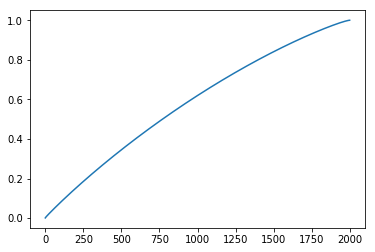

In [11]:
S_ = S/np.sum(S)
S_ = np.cumsum(S_)
S_sorted = sorted(S_)
dim = np.searchsorted(S_sorted, .95, side = 'right')
print(f'The new space after reduction has dimension: {dim}')
plt.plot(S_sorted)
plt.show()

### Using PCA reduction dimension technique

In [12]:
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA

In [13]:
method ='pcaj'

if method == 'pca':
    pca_ = PCA(n_components = dim)
    train_data_reduced = pca_.fit_transform(train_data)
    test_data_reduced = pca_.transform(test_data)
else:  
    pca_ker = KernelPCA(n_components = dim, kernel = 'rbf', gamma = 0.04)
    train_data_reduced = pca_ker.fit_transform(train_data)
    test_data_reduced = pca_ker.transform(test_data)

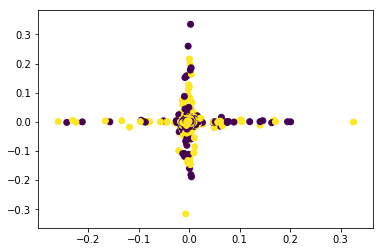

In [14]:
plt.scatter(train_data_reduced[:,0], train_data_reduced[:,1], c = Y_train['Bound'].values)
plt.show()

### Let us Visualize our distribution

In [15]:
Y = Y_train['Bound'].values
var, count = np.unique(Y, return_counts=True)
count

array([1002,  998])

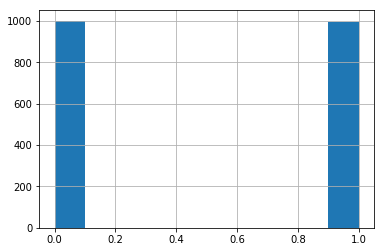

In [16]:
Y_train['Bound'].hist()
plt.show()

### **Training data with Logistic regression**

In [17]:
X = train_data_reduced
m = len(Y)
#X = np.hstack((np.ones((m,1)),X))

itert = 1000
lrn_rate = 0.01
n = np.size(X,1)
params = np.zeros((n,))

# Define the sigmoid
def sig(x):
    y = 1/(1 + np.exp(-x))
    return y
# Cost function
def cost_funct(X, y, theta):
    m = len(y)
    sig_out = sig(X @ theta)
    epsilon = 1e-8
    cost = (1/m)*(((-y).T @ np.log(sig_out + epsilon))-((1-y).T @ np.log(1-sig_out + epsilon)))
    return cost
# Gradient descent
def gradient_descent(X, y, params, lrn_rate, itert):
    m = len(y)
    cost_ = np.zeros((itert,1))
    for i in range(itert):
        params = params - (lrn_rate/m) * (X.T @ (sig(X @ params) - y)) 
        cost_[i] = cost_funct(X, y, params)
    return (cost_, params)
def newton_raphson(X, y, params, lrn_rate, itert):
    m = len(y)
    cost_ = np.zeros((itert,1))
    for i in range(itert):
        Y_n = sig(X @ theta)
        R_n = Y_n*(1-Y_n)
        R_  = np.diag(R_n)
        params = params - np.linalg.inv((X.T @ R_ @ X))@ X.T@(Y_n -y)
        cost_[i] = cost_funct(X, y, params)
    return (cost_, params)
# Prediction
def predict(X, params):
    return np.round(sig(X @ params))

### **Prediction with Logistic regression**

In [18]:
result = gradient_descent(X, Y, params, lrn_rate, itert)

#best parameter
theta  = result[1]
#final loss
loss = result[0]
#prediction
pr = predict(X, theta)
acc = np.mean(pr == Y)
acc

0.986

In [19]:
pr = np.round(predict(test_data_reduced, theta))
pr = np.array(pr, dtype= int)
pr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
submission = pd.DataFrame(pr, columns=['Bound'])
submission['Id'] = range(len(test_data_reduced))
sub = submission[['Id', 'Bound']]

sub.reset_index(drop=True, inplace=True)

sub.to_csv('my_submission.csv', header = True, index = False)

<h1><center><font color="blue">Preprocessing using one hot encoding</center></h1>

In [21]:
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


### Data generation

In [23]:
#Laod data
x_train = pd.read_csv('Xtr.csv')

x_test = pd.read_csv('Xte.csv')
x_train.head(5)


,Id,seq
0,0,GAGGGGCTGGGGAGGGGGCTGGCCCAGAGGCACCAGACTCTGCAGA...
1,1,CGGCCTGGGGGCCACATGTGAGTGCTTACCTGTGTGGGGATGAGGG...
2,2,GACAACGCCGCTGTCAGCCGCCTTCGACTCACCTGGGAGGTGATGA...
3,3,GCCTCCCTTGGCACCACGGGAGACCAGTTTTGGAGGGGCGGGGCTG...
4,4,GCACTACTACACCCATTGCTGTAATAGTAAGTGCCGGTGCCTTCAC...


In [24]:
Y_train = pd.read_csv('Ytr.csv')

In [25]:


### preprocessing
from collections import defaultdict
sq = ['A', 'C', 'G', 'T']
k=2#3
def feature_generator(sq, k):
    sq1 = sq.copy()
    encode = defaultdict(lambda:0)
    if k>1:
        i=0
        while i<k-1:
            col = [a+b for a in sq for b in sq1]
            sq1 = col.copy()
            i += 1
        for a,b in enumerate(col):
            encode[b] = a
    else:
        col = sq.copy()
        for a,b in enumerate(col):
            encode[b] = a
    return col, encode

def one_hot_encode(df, sq, k):
    genes = "ACGT"
    feature, encode = feature_generator(sq,k)
    
    chr_to_int = {ch : int_ for int_ , ch in enumerate(genes)}
    List_ = []
    for gens in df.seq:
        n = len(gens)
        encode_gen = [encode[gens[idx:idx+k]] for idx in range(n-k+1)]
        encode_list = []
        for num in encode_gen:
            encode_ = [0 for _ in range(len(feature))]
            encode_[num] = 1
            encode_list += encode_
        List_.append(encode_list)
        
    return np.array(List_, dtype = float)

if __name__ == "__main__":
    train_data = one_hot_encode(x_train,sq,k )
    test_data = one_hot_encode(x_test, sq,k)
sum(train_data[0])

100.0

In [26]:
rb_scaler = MinMaxScaler()#StandardScaler()
train_data = rb_scaler.fit_transform(train_data)
test_data = rb_scaler.transform(test_data)

In [27]:
test_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [28]:
train_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
Y_train.Bound.values

array([1, 0, 1, ..., 1, 1, 1])

In [30]:
y_train = np.where(Y_train.Bound.values == 0,-1,1)

In [31]:
y_train 


array([ 1, -1,  1, ...,  1,  1,  1])

### Training and Validation set

In [32]:
x_train, x_val, y_train, y_val = train_test_split(train_data , y_train, test_size = .1, random_state = 109)

In [33]:
x_train.shape,y_train.shape# 0.22 0.3 donne 658 split xtrain

((1800, 1600), (1800,))

***
Kernel implementations
----
***

In [34]:
def rbf_kernel(X1, X2, sigma=10):
    # For loop with rbf_kernel_element works but is slow in python
    # Use matrix operations!
    X2_norm = np.sum(X2 ** 2, axis = -1)
    X1_norm = np.sum(X1 ** 2, axis = -1)
    gamma = 1 / (2 * sigma ** 2)
    K = np.exp(- gamma * (X1_norm[:, None] + X2_norm[None, :] - 2 * np.dot(X1, X2.T)))
    return K

def linear_kernel(X1, X2):
    
    return X1.dot(X2.T)

def quadratic_kernel(X1, X2, power=2):
    
    return (1 + linear_kernel(X1, X2))**power 


In [35]:
# Prediction error
def error(ypred, ytrue):
    e = (ypred != ytrue).mean()
    return e

***
# Kernel Methods
***



In [36]:
class KernelMethodBase(object):
    '''
    Base class for kernel methods models
    
    Methods
    ----
    fit
    predict
    '''
    kernels_ = {
        'linear': linear_kernel,
        'quadratic': quadratic_kernel,
        'rbf': rbf_kernel,
    }
    def __init__(self, kernel='linear', **kwargs):
        self.kernel_name = kernel
        self.kernel_function_ = self.kernels_[kernel]
        self.kernel_parameters = self.get_kernel_parameters(**kwargs)
        
    def get_kernel_parameters(self, **kwargs):
        params = {}
        if self.kernel_name == 'rbf':
            params['sigma'] = kwargs.get('sigma', None)
        return params

    def fit(self, X, y, **kwargs):
        return self
        
    def decision_function(self, X):
        pass

    def predict(self, X):
        pass

***
## Kernel Logistic Regression
***



In [37]:
class KernelRidgeRegression(KernelMethodBase):
    '''
    Kernel Ridge Regression
    '''
    def __init__(self, lambd=0.1, **kwargs):
        self.lambd = lambd
        # Python 3: replace the following line by
        # super().__init__(**kwargs)
        super(KernelRidgeRegression, self).__init__(**kwargs)

    def fit(self, X, y):

        self.X_train = X
        self.y_train = y
        n = len(self.y_train)
        
        A = self.kernel_function_(X, X, **self.kernel_parameters)
        A[np.diag_indices_from(A)] += self.lambd * n
        # self.alpha = (K + n lambda I)^-1 y
        self.alpha = np.linalg.solve(A , self.y_train)

        return self
    
    def decision_function(self, X):
        K_x = self.kernel_function_(X, self.X_train, **self.kernel_parameters)
        return K_x.dot(self.alpha)
    
    def predict(self, X):
        return self.decision_function(X)
    
    
class WeightedKernelRidgeRegression(KernelRidgeRegression):
    '''
    Weighted Kernel Ridge Regression
    
    This is just used for the KernelLogistic following up
    '''
    def fit(self, K, y, sample_weights=None):

        self.y_train = y
        n = len(self.y_train)
        
        w = np.ones_like(self.y_train) if sample_weights is None else sample_weights
        W = np.diag(np.sqrt(w))
        
        A = W.dot(K).dot(W)
        A[np.diag_indices_from(A)] += self.lambd * n
        # self.alpha = W (K + n lambda I)^-1 W y
        self.alpha = W.dot(np.linalg.solve(A , W.dot(self.y_train)))

        return self

In [38]:
# prof x_train, x_val, y_train, y_val 
kernel = 'rbf'
lambd = 0.01
sigma = 5.
model = KernelRidgeRegression(
        kernel=kernel,
        lambd=lambd,
        sigma=sigma
    )
ypred = model.fit(x_train, y_train).predict(x_val)

In [39]:
ypred = np.where((ypred < 0), -1,1)
ypred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,
        1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1])

In [40]:
np.mean(ypred==y_val)

0.63

In [41]:
# prof

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class KernelLogisticRegression(KernelMethodBase):
    '''
    Kernel Logistic Regression
    '''
    def __init__(self, lambd=0.1, **kwargs):
        self.lambd = lambd
        
        super(KernelLogisticRegression, self).__init__(**kwargs)

    def fit(self, X, y, max_iter=100, tol=1e-5):
    
        self.X_train = X
        self.y_train = y
        
        K = self.kernel_function_(X, X, **self.kernel_parameters)
        
        # IRLS
        WKRR = WeightedKernelRidgeRegression(
            lambd=self.lambd,
            kernel=self.kernel_name,
            **self.kernel_parameters
        )
        # Initialize
        alpha = np.zeros_like(self.y_train)
        # Iterate until convergence or max iterations
        for n_iter in range(max_iter):
            alpha_old = alpha
            f = K.dot(alpha_old)
            w = sigmoid(f) * sigmoid(-f)
            z = f + y / sigmoid(-y*f)
            alpha = WKRR.fit(K, z, sample_weights=w).alpha
            # Break condition (achieved convergence)
            if np.sum((alpha-alpha_old)**2) < tol:
                break
        self.n_iter = n_iter
        self.alpha = alpha

        return self
            
    def decision_function(self, X):
        K_x = self.kernel_function_(X, self.X_train, **self.kernel_parameters)    
        return sigmoid(K_x.dot(self.alpha))

    def predict(self, X):
        y = self.decision_function(X)
        predicted_classes = np.where((y < 0.5), -1, 1)
        return predicted_classes

In [42]:
kernel = 'quadratic'
lambd = .1
sigma = 1
model = KernelLogisticRegression(
        kernel=kernel,
        lambd=lambd,
        sigma=sigma
    )

pre = model.fit(x_train, y_train).predict(x_val)
pre = np.where((pre == -1),0,1)
len(pre)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


200

In [43]:
np.mean(pre == y_val)

0.5

In [44]:
pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [45]:
kernel = 'quadratic'
sigma = .2#.4
lambd = 1#1
fig_title = 'Logistic Regression, {} Kernel'.format(kernel)

model = KernelLogisticRegression(lambd=lambd, kernel=kernel, sigma=sigma)
y_pred = model.fit(x_train, y_train).predict(x_val)
# plot_decision_function(model, X_train, y_train, title=fig_title)
print('Test error: {:.2%}'.format(error(y_pred, y_val)))

Test error: 34.50%


In [46]:
np.mean(y_pred == y_val)

0.655

In [47]:
y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
        1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
        1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1])

In [48]:
y_pred = model.fit(x_train, y_train).predict(test_data)

In [49]:
y_pred

array([ 1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
        1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,
        1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1

In [50]:
y_pred = np.where((y_pred==-1), 0, 1)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [51]:
submission_ = pd.DataFrame(y_pred, columns=['Bound'])
submission_['Id'] = range(len(y_pred))
sub = submission_[['Id', 'Bound']]



sub.to_csv('first_submission_64acc.csv', header = True, index = False)

#!kaggle competitions submit -c kernel-methods-ammi-2020 -f my_submission_645.csv -m "Star Group"

In [52]:
kernel = 'quadratic'
sigma = .2
lambd = 10.
fig_title = 'Logistic Regression, {} Kernel'.format(kernel)

model = KernelLogisticRegression(lambd=lambd, kernel=kernel, sigma=sigma)
y_pred = model.fit(x_train, y_train).predict(x_val)
# plot_decision_function(model, X_train, y_train, title=fig_title)
print('Test error: {:.2%}'.format(error(y_pred, y_val)))

Test error: 33.50%


In [53]:
np.mean(y_pred == y_val)

0.665

In [54]:
kernel = 'rbf'
sigma = 10

lambd = 1
fig_title = 'Logistic Regression, {} Kernel'.format(kernel)

model = KernelLogisticRegression(lambd=lambd, kernel=kernel, sigma=sigma)
y_pred = model.fit(x_train, y_train).predict(x_val)
# plot_decision_function(model, X_train, y_train, title=fig_title)
print('Test error: {:.2%}'.format(error(y_pred, y_val)))

Test error: 43.50%


In [55]:
np.mean(y_pred == y_val)

0.565

***
## Kernel SVM
***

In [56]:
import cvxopt

def cvxopt_qp(P, q, G, h, A, b):
    P = .5 * (P + P.T)
    cvx_matrices = [
        cvxopt.matrix(M) if M is not None else None for M in [P, q, G, h, A, b] 
    ]
    #cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(*cvx_matrices, options={'show_progress': False})
    return np.array(solution['x']).flatten()

solve_qp = cvxopt_qp

In [57]:
def svm_dual_soft_to_qp_kernel(K, y, C=1):
    n = K.shape[0]
    assert (len(y) == n)
        
    # Dual formulation, soft margin
    P = np.diag(y).dot(K).dot(np.diag(y))
    # As a regularization, we add epsilon * identity to P
    eps = 1e-12
    P += eps * np.eye(n)
    q = - np.ones(n)
    G = np.vstack([-np.eye(n), np.eye(n)])
    h = np.hstack([np.zeros(n), C * np.ones(n)])
    A = y[np.newaxis, :]
    A = A.astype('float')
    b = np.array([0.])
    return P, q, G, h, A, b

K = linear_kernel(x_train, x_train)
alphas = solve_qp(*svm_dual_soft_to_qp_kernel(K, y_train, C=10.))

In [58]:
class KernelSVM(KernelMethodBase):
    '''
    Kernel SVM Classification
    
    Methods
    ----
    fit
    predict
    '''
    def __init__(self, C=0.2, **kwargs):
        self.C = C
        # Python 3: replace the following line by
        # super().__init__(**kwargs)
        super(KernelSVM, self).__init__(**kwargs)

    def fit(self, X, y, tol=1e-5):
        n, p = X.shape
        assert (n == len(y))
    
        self.X_train = X
        self.y_train = y
        
        # Kernel matrix
        K = self.kernel_function_(self.X_train, self.X_train, **self.kernel_parameters)
        
        # Solve dual problem
        self.alpha = solve_qp(*svm_dual_soft_to_qp_kernel(K, y, C=self.C))
        
        # Compute support vectors and bias b
        sv = np.logical_and((self.alpha > tol), (self.C - self.alpha > tol))
        self.bias = y[sv] - K[sv].dot(self.alpha * y)
        print(self.bias)
        self.bias = self.bias.mean()

        self.support_vector_indices = np.nonzero(sv)[0]

        return self
        
    def decision_function(self, X):
        K_x = self.kernel_function_(X, self.X_train, **self.kernel_parameters)
        return K_x.dot(self.alpha * self.y_train) + self.bias

    def predict(self, X):
        return np.sign(self.decision_function(X))

In [59]:
kernel = 'quadratic'
sigma = .1#0.01 donne.65
C = .1 #5 est 65
model = KernelSVM(C=C, kernel=kernel, sigma=sigma)
y_pred = model.fit(x_train, y_train).predict(x_val)
y_pred2 = model.fit(x_train, y_train).predict(x_train)

# plot_decision_function(model, X_test, y_test,
#                        title='SVM {} Kernel'.format(kernel))
#print('Test accuracy: {:.2%}'.format(accuracy_score(y_pred, y_test)))
#print('Train accuracy: {:.2%}'.format(accuracy_score(y_pred2, y_train)))

[0.08781279 0.08781331 0.08781272 ... 0.08781326 0.08781327 0.08781276]
[0.08781279 0.08781331 0.08781272 ... 0.08781326 0.08781327 0.08781276]


In [60]:
model.support_vector_indices

array([   0,    1,    2, ..., 1797, 1798, 1799])

In [61]:
np.mean(y_pred==y_val)


0.645

In [62]:
y_pred = model.fit(x_train, y_train).predict(test_data)

[0.08781279 0.08781331 0.08781272 ... 0.08781326 0.08781327 0.08781276]


In [63]:
y_pred = np.where((y_pred == -1),0,1)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [64]:
submission_ = pd.DataFrame(y_pred, columns=['Bound'])
submission_['Id'] = range(len(y_pred))
sub = submission_[['Id', 'Bound']]


sub.to_csv('my_submission_.csv', header = True, index = False)